# Imports


In [1]:
# library required in the task for Supervised Learning models
import recordlinkage

# data processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

The Task:

This task comes from an orginization I have with a company and is intended to reduce their manual data validation workload. The task is to create a method of identify potential matches between two of their databases. One is an operational database while the other is a billing database. What constitutes a match is when the piece of equipment from the operational database is for the same piece of equipment from the billing database. 

Due to privacy considerations, the data I have used for all of my analysis in this workbook comes from a public Kaggle database with similar relevant features. 

Objective:
To create, train, and tune a set of different models to determine which kind of supervised learning is best suited for determining whether a pair of locations are a "match" (referring to the same place) or not.


Requirements:
- use of recordlinkage package


The Data:

This dataset is a set of pairs of two different data sets for different locations such as gyms, restaurants, and bars. Each location has 12 attributes from an ID, name, address, etc. The data is known to have noise, errors, and generally unkept prior to any analysis or cleaning done here.

[Data Source](https://www.kaggle.com/datasets/robikscube/foursquare-location-matching-parquet)

**The data is also provided in the gitub*

In [2]:
# df_train = pd.read_parquet('data/train.parquet', engine="fastparquet")
df_pairs = pd.read_parquet('data/pairs.parquet', engine="fastparquet")

# EDA

In [3]:
df_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578907 entries, 0 to 578906
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_1          578907 non-null  object 
 1   name_1        578907 non-null  object 
 2   latitude_1    578907 non-null  float64
 3   longitude_1   578907 non-null  float64
 4   address_1     475383 non-null  object 
 5   city_1        512928 non-null  object 
 6   state_1       452316 non-null  object 
 7   zip_1         359509 non-null  object 
 8   country_1     578899 non-null  object 
 9   url_1         231806 non-null  object 
 10  phone_1       270022 non-null  object 
 11  categories_1  562613 non-null  object 
 12  id_2          578907 non-null  object 
 13  name_2        578907 non-null  object 
 14  latitude_2    578907 non-null  float64
 15  longitude_2   578907 non-null  float64
 16  address_2     312497 non-null  object 
 17  city_2        367490 non-null  object 
 18  stat

In [4]:
# this is the data set with pairs of known true/false matched
df_pairs.columns

Index(['id_1', 'name_1', 'latitude_1', 'longitude_1', 'address_1', 'city_1',
       'state_1', 'zip_1', 'country_1', 'url_1', 'phone_1', 'categories_1',
       'id_2', 'name_2', 'latitude_2', 'longitude_2', 'address_2', 'city_2',
       'state_2', 'zip_2', 'country_2', 'url_2', 'phone_2', 'categories_2',
       'match'],
      dtype='object')

In [5]:
for c in df_pairs.columns:
    print(c)
    print(df_pairs[c].value_counts())


id_1
E_74ba66c8496334    348
E_b6ceee199e8056    198
E_ac5beaeebfa250    165
E_62cd73485781f1    144
E_04a6de32cff9d7    133
                   ... 
E_5a3cef402e6bb6      1
E_5a3cbc1c7be495      1
E_5a3c9a41aad6b4      1
E_5a3c82ea4dbd8c      1
E_ffffe6f4652fbb      1
Name: id_1, Length: 464765, dtype: int64
name_1
Starbucks                    3871
McDonald's                   2985
Redbox                       1436
KFC                          1338
7-Eleven                     1059
                             ... 
Federale Politie Oostende       1
Vecio Fritolin                  1
Jesse's Room                    1
U Lohmühlenstraße               1
Waihi Beach                     1
Name: name_1, Length: 369287, dtype: int64
latitude_1
 38.415602    857
-6.125748     348
 53.872799    198
-6.834269     165
 41.041172    144
             ... 
 14.672601      1
 40.093193      1
 36.372353      1
 39.907265      1
-37.417042      1
Name: latitude_1, Length: 462374, dtype: int64
longitude_

<AxesSubplot:>

C:\Users\jacob\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jacob\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3595 (\N{THAI CHARACTER SO SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jacob\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jacob\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jacob\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) 

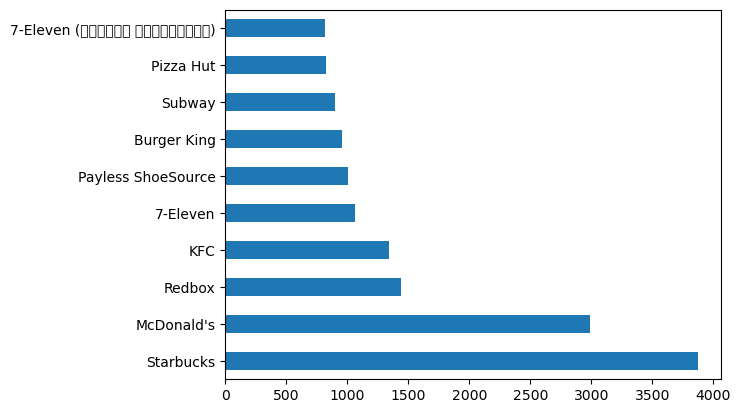

In [6]:
df_pairs['name_1'].value_counts()[:10].plot(kind='barh')

This is where I discovered some data cleaning needs related to strange characters and data inside parenthesis.

<AxesSubplot:>

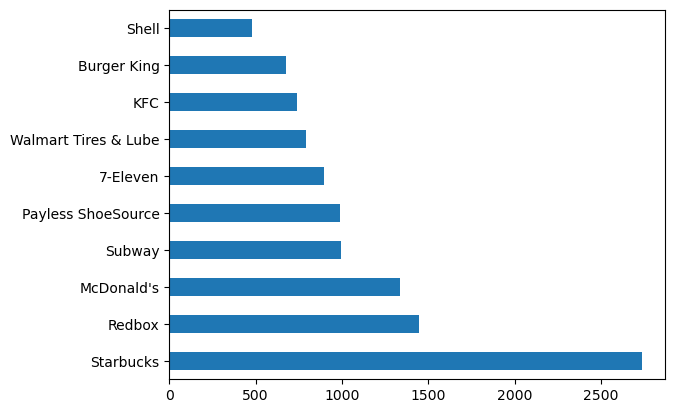

In [7]:
df_pairs['name_2'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

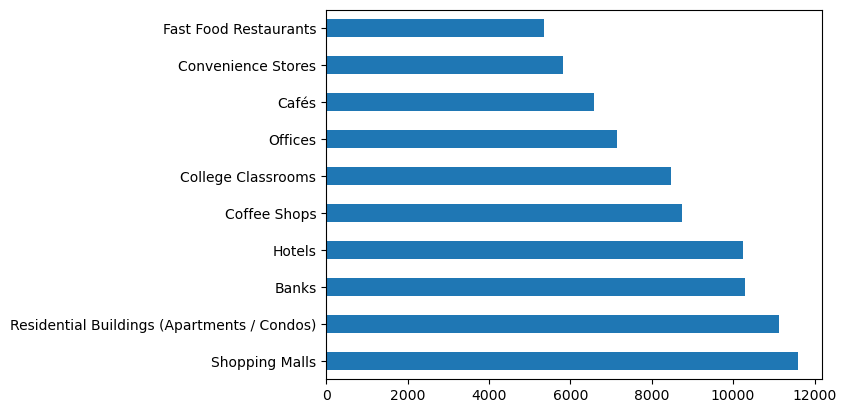

In [8]:
df_pairs['categories_1'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

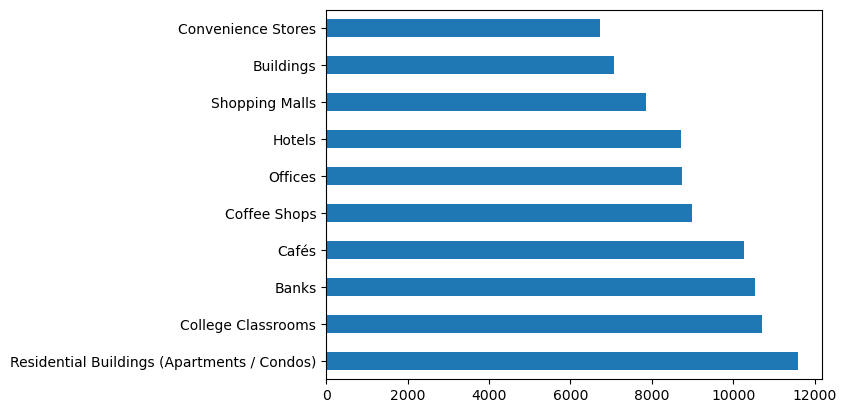

In [9]:
df_pairs['categories_2'].value_counts()[:10].plot(kind='barh')

In [10]:
# proportion of missing values
(df_pairs.isna().sum()[df_pairs.isna().sum() != 0] / len(df_pairs)).sort_values(ascending = False)

url_2           0.853431
phone_2         0.794504
zip_2           0.611635
url_1           0.599580
phone_1         0.533566
state_2         0.465045
address_2       0.460195
zip_1           0.378987
city_2          0.365200
state_1         0.218672
address_1       0.178827
categories_2    0.131240
city_1          0.113972
categories_1    0.028146
country_1       0.000014
country_2       0.000010
dtype: float64

# 0. Pre-Processing

In this section I do the following:
1. Drop column pairs with high proportion of missing values
2. Separate matches into its component sets
3. Remove duplicates
4. Set indexes for the data sets 
5. Remove non-numeric characters from phone numbers

6. Clean name, address, and categories columns by:
    1. Converting to lowercase
    2. removing brackets and what is inside them
    3. removing accents

7. Add new columns for feature engineering
    1. Phonetic name - dlkajf;sldkfj

In [11]:
# drop column pairs with more than .3 (30%) missing values in both pair elements

# url_1 and url_2 > .3
df_pairs = df_pairs.drop(columns = ['url_1', 'url_2'])

# phone_1 and phone_2 > .3
df_pairs = df_pairs.drop(columns = ['phone_1', 'phone_2'])

In [12]:
#split the pairs into their component sets
df_1 = df_pairs.iloc[:,0:10]
df_2 = df_pairs.iloc[:,10:20]

#remove duplicates for what will become the index column
df_1 = df_1.drop_duplicates(subset=['id_1'])
df_2 = df_2.drop_duplicates(subset=['id_2'])

# set the index to be the ids of the pair
df_pairs = df_pairs.set_index(['id_1', 'id_2'])
df_1 = df_1.set_index(['id_1'])
df_2 = df_2.set_index(['id_2'])

# df_1

In [13]:
## no longer in use. left for reference purposes

#clean up the phone nubmers by removing all non-numbers (except +)

# from recordlinkage.preprocessing import phonenumbers

# df_1["phone_1"] = phonenumbers(df_1["phone_1"])
# df_2["phone_2"] = phonenumbers(df_2["phone_2"])

In [14]:
## TUNING HERE

# clean up the name, address, categories columns before converting to phonetic

from recordlinkage.preprocessing import clean

df_1["name_1"] = clean(df_1["name_1"], lowercase=True, strip_accents='unicode')
df_2["name_2"] = clean(df_2["name_2"], lowercase=True, strip_accents='unicode')


## test remove brackets
df_1["address_1"] = clean(df_1["address_1"], lowercase=True, strip_accents='unicode', remove_brackets=True)
df_2["address_2"] = clean(df_2["address_2"], lowercase=True, strip_accents='unicode', remove_brackets=True)


## test remove brackets
df_1["categories_1"] = clean(df_1["categories_1"], lowercase=True, strip_accents='unicode', remove_brackets=True)
df_2["categories_2"] = clean(df_2["categories_2"], lowercase=True, strip_accents='unicode', remove_brackets=True)

In [15]:
## HYPER PARAMETER TUNING HERE
# 1. Hyper parameter for phonetic()
# 2. Which of these new columns provide useful info in model? IE. Correlation matrix

from recordlinkage.preprocessing import phonetic

df_1["phonetic_name_1"] = phonetic(df_1["name_1"], "metaphone")
df_2["phonetic_name_2"] = phonetic(df_2["name_2"], "metaphone")

df_1["phonetic_address_1"] = phonetic(df_1["address_1"], "metaphone")
df_2["phonetic_address_2"] = phonetic(df_2["address_2"], "metaphone")

df_1["phonetic_address_1"] = phonetic(df_1["address_1"], "metaphone")
df_2["phonetic_address_2"] = phonetic(df_2["address_2"], "metaphone")

1. Indexing

In [16]:
# get the index pairs for all of the true matches (needed for training in recordlinkage)

df_1_idx = []
df_2_idx = []

full_idx = []

for index, row in df_pairs.iterrows():
    full_idx.append(index)
    if row['match'] == True:
        df_1_idx.append(index[0])
        df_2_idx.append(index[1])

arrays = [
    df_1_idx,
    df_2_idx,
]

tuples = list(zip(*arrays))

true_index = pd.MultiIndex.from_tuples(tuples, names=["id_1", "id_2"])
full_index = pd.MultiIndex.from_tuples(full_idx, names=["id_1", "id_2"])

# 2. Comparing

In [17]:
## FEATURE ENGINEERING

compare_cl = recordlinkage.Compare()

compare_cl.string("name_1", "name_2", method='levenshtein', label='name')
compare_cl.string("phonetic_name_1", "phonetic_name_2", method='levenshtein', label='phonetic_name')

compare_cl.string("address_1", "address_2", method='levenshtein', label='address')
compare_cl.string("phonetic_address_1", "phonetic_address_2", method='levenshtein', label='phonetic_address')

compare_cl.string("categories_1", "categories_2", method='levenshtein', label='categories')


compare_cl.string("state_1", "state_2", method='levenshtein', label='state') 
compare_cl.exact("zip_1", "zip_2", label='zip') 
compare_cl.exact("country_1", "country_2", label='country')
compare_cl.geo("latitude_1", "longitude_1", "latitude_2", "longitude_2", method='linear', label='distance')

features = compare_cl.compute(full_index, df_1, df_2)

In [18]:
features

,,name,phonetic_name,address,phonetic_address,categories,state,zip,country,distance
id_1,id_2,,,,,,,,,
E_000001272c6c5d,E_da7fa3963561f8,0.750000,0.666667,0.000000,0.000000,1.000000,0.0,0,1,0.477146
E_000008a8ba4f48,E_3f12df0b045062,1.000000,1.000000,0.142857,0.153846,0.277778,0.0,0,1,0.634265
E_000023d8f4be44,E_12453effe251db,0.555556,0.700000,0.000000,0.000000,1.000000,0.0,0,1,0.929748
E_00007dcd2bb53f,E_f131dcb7f07be9,0.312500,0.375000,0.000000,0.000000,1.000000,1.0,0,1,0.992133
E_0000c362229d93,E_d52c3c4d53831c,0.900000,1.000000,0.263158,0.272727,0.468750,1.0,1,1,0.648781
...,...,...,...,...,...,...,...,...,...,...
E_ffff80f94b2fee,E_75feaa1e0321cc,0.375000,0.444444,0.764706,1.000000,0.000000,0.0,0,1,0.954333
E_ffff8cc1b92ab3,E_ad351ad024c4dd,0.521739,0.555556,0.000000,0.000000,0.173913,0.0,0,1,0.952983
E_ffff989ae206f8,E_a5bc397a4eaeff,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1,1,0.568215


In [19]:
# split the data for training and testing

df_train, df_test = train_test_split(features, test_size = 0.2, random_state = 40)

In [20]:
# extract the true pairs for each data set (this is our y or response)

train_matches_index = df_train.index.intersection(true_index)
test_matches_index = df_test.index.intersection(true_index)

In [21]:
# for score tracking of the different models
models = []
t_pos = []
t_neg = []
f_pos = []
f_neg = []
precision = []
recall = []
accuracy = []
specificty = []
fscore = []


## Linear Regression

In [22]:
## HYPER PARAMETER TUNING

logreg = recordlinkage.LogisticRegressionClassifier(penalty='l2', solver='newton-cg', max_iter=10000)

logreg.fit(df_train, train_matches_index)
print ("Intercept: ", logreg.intercept)
print ("Coefficients: ", logreg.coefficients)

Intercept:  1.7228882620678456
Coefficients:  [ 0.38341905  0.54716381  0.73805213 -0.72169312  0.70123667 -0.61998809
  0.2059989  -1.2412771  -0.43184437]


In [23]:
results_logreg = logreg.predict(df_test)
len(results_logreg)

109693

In [24]:
#record different metrics for the model

models.append("Logistic Regression 80/20")
t_pos.append(recordlinkage.true_positives(test_matches_index, results_logreg))
t_neg.append(recordlinkage.true_negatives(test_matches_index, results_logreg, len(df_test)))
f_pos.append(recordlinkage.false_positives(test_matches_index, results_logreg))
f_neg.append(recordlinkage.false_negatives(test_matches_index, results_logreg))
precision.append(recordlinkage.precision(test_matches_index, results_logreg))
recall.append(recordlinkage.recall(test_matches_index, results_logreg))
accuracy.append(recordlinkage.accuracy(test_matches_index, results_logreg, len(df_test)))
specificty.append(recordlinkage.specificity(test_matches_index, results_logreg, len(df_test)))
fscore.append(recordlinkage.fscore(test_matches_index, results_logreg))

## Naive Bayes Classifier

In [25]:
## HYPER PARAMTER TUNING
#.5 worse than .3
#.1 worse than .3
#.15 better than .3

nb = recordlinkage.NaiveBayesClassifier(binarize=.3, use_col_names=True)
nb.fit(df_train, train_matches_index)

nb.weights

{'name': {0.0: 0.7160208883914992, 1.0: 1.1948429379105145},
 'phonetic_name': {0.0: 0.7159026296218189, 1.0: 1.1821356479700984},
 'address': {0.0: 0.9880837826244082, 1.0: 1.025704134204252},
 'phonetic_address': {0.0: 1.010544032907515, 1.0: 0.9751680917574198},
 'categories': {0.0: 0.6855942511915672, 1.0: 1.352619867443149},
 'state': {0.0: 1.1502527191766116, 1.0: 0.8106653868279875},
 'zip': {0.0: 1.000829391989841, 1.0: 0.9976090360138047},
 'country': {0.0: 4.841307924083898, 1.0: 0.996617063615396},
 'distance': {0.0: 1.8580264902412835, 1.0: 0.9202462877060511}}

In [26]:
results_nb = nb.predict(df_test)
len(results_nb)

101058

In [27]:
models.append("Naive Bayes 80/20")
t_pos.append(recordlinkage.true_positives(test_matches_index, results_nb))
t_neg.append(recordlinkage.true_negatives(test_matches_index, results_nb, len(df_test)))
f_pos.append(recordlinkage.false_positives(test_matches_index, results_nb))
f_neg.append(recordlinkage.false_negatives(test_matches_index, results_nb))
precision.append(recordlinkage.precision(test_matches_index, results_nb))
recall.append(recordlinkage.recall(test_matches_index, results_nb))
accuracy.append(recordlinkage.accuracy(test_matches_index, results_nb, len(df_test)))
specificty.append(recordlinkage.specificity(test_matches_index, results_nb, len(df_test)))
fscore.append(recordlinkage.fscore(test_matches_index, results_nb))

## Support Vector Machine

In [28]:
## HYPER PARAMETER TUNING
# 1. squared_hinge better than hinge
# 2. blanced is not good for call_weight

# train the SVM classifier

svm = recordlinkage.SVMClassifier(loss='squared_hinge', class_weight=None, max_iter=10000)
svm.fit(df_train, train_matches_index)

In [29]:
# Prediciton

result_svm = svm.predict(df_test)
len(result_svm)

111340

In [30]:
models.append("SVM 80/20")
t_pos.append(recordlinkage.true_positives(test_matches_index, result_svm))
t_neg.append(recordlinkage.true_negatives(test_matches_index, result_svm, len(df_test)))
f_pos.append(recordlinkage.false_positives(test_matches_index, result_svm))
f_neg.append(recordlinkage.false_negatives(test_matches_index, result_svm))
precision.append(recordlinkage.precision(test_matches_index, result_svm))
recall.append(recordlinkage.recall(test_matches_index, result_svm))
accuracy.append(recordlinkage.accuracy(test_matches_index, result_svm, len(df_test)))
specificty.append(recordlinkage.specificity(test_matches_index, result_svm, len(df_test)))
fscore.append(recordlinkage.fscore(test_matches_index, result_svm))

# Comparing - Round 2

Adjusting train test splits to be more representative of the real world task (i.e, small training data set)

In [31]:
# split the data for training and testing

df_train2, df_test2 = train_test_split(features, test_size = 0.95, random_state = 40)

In [32]:
# extract the true pairs for each data set (this is our y or response)

train_matches_index2 = df_train2.index.intersection(true_index)
test_matches_index2 = df_test2.index.intersection(true_index)

## Linear Regression

In [33]:
## HYPER PARAMETER TUNING

logreg2 = recordlinkage.LogisticRegressionClassifier(penalty='l2', solver='newton-cg', max_iter=10000)

logreg2.fit(df_train2, train_matches_index2)
print ("Intercept: ", logreg2.intercept)
print ("Coefficients: ", logreg2.coefficients)

Intercept:  2.2662875517260153
Coefficients:  [ 0.37073955  0.53595403  0.60825586 -0.63557576  0.71652891 -0.60168574
  0.20689155 -1.78235946 -0.40983783]


In [34]:
results_logreg2 = logreg2.predict(df_test2)
len(results_logreg2)

522740

In [35]:
#make sure the parameters for this are correct

recordlinkage.confusion_matrix(test_matches_index2, results_logreg2, len(df_test2))

array([[368958,   9882],
       [153782,  17340]])

In [36]:
models.append("Logistic Regression 5/95")
t_pos.append(recordlinkage.true_positives(test_matches_index2, results_logreg2))
t_neg.append(recordlinkage.true_negatives(test_matches_index2, results_logreg2, len(df_test2)))
f_pos.append(recordlinkage.false_positives(test_matches_index2, results_logreg2))
f_neg.append(recordlinkage.false_negatives(test_matches_index2, results_logreg2))
precision.append(recordlinkage.precision(test_matches_index2, results_logreg2))
recall.append(recordlinkage.recall(test_matches_index2, results_logreg2))
accuracy.append(recordlinkage.accuracy(test_matches_index2, results_logreg2, len(df_test2)))
specificty.append(recordlinkage.specificity(test_matches_index2, results_logreg2, len(df_test2)))
fscore.append(recordlinkage.fscore(test_matches_index2, results_logreg2))

## Naive Bayes Classifier

In [37]:
## HYPER PARAMTER TUNING
#.5 worse than .3
#.1 worse than .3
#.15 better than .3

nb2 = recordlinkage.NaiveBayesClassifier(binarize=.3, use_col_names=True)
nb2.fit(df_train2, train_matches_index2)

nb2.weights

{'name': {0.0: 0.7336278884014422, 1.0: 1.1813459759580416},
 'phonetic_name': {0.0: 0.7359752394077721, 1.0: 1.1704958739948856},
 'address': {0.0: 0.9904442108031484, 1.0: 1.02068068966038},
 'phonetic_address': {0.0: 1.0132523537861935, 1.0: 0.9688525287927281},
 'categories': {0.0: 0.6838502123511442, 1.0: 1.3612387681947504},
 'state': {0.0: 1.1516968299870112, 1.0: 0.8087019131294761},
 'zip': {0.0: 1.0042304060209124, 1.0: 0.9877715115192306},
 'country': {0.0: 13.83537741827463, 1.0: 0.9957194958465403},
 'distance': {0.0: 1.7912656591630447, 1.0: 0.9255392471887293}}

In [38]:
results_nb2 = nb2.predict(df_test2)
len(results_nb2)

479637

In [39]:
recordlinkage.confusion_matrix(test_matches_index2, results_nb2, len(df_test2))

array([[345926,  32914],
       [133711,  37411]])

In [40]:
models.append("Naive Bayes 5/95")
t_pos.append(recordlinkage.true_positives(test_matches_index2, results_nb2))
t_neg.append(recordlinkage.true_negatives(test_matches_index2, results_nb2, len(df_test2)))
f_pos.append(recordlinkage.false_positives(test_matches_index2, results_nb2))
f_neg.append(recordlinkage.false_negatives(test_matches_index2, results_nb2))
precision.append(recordlinkage.precision(test_matches_index2, results_nb2))
recall.append(recordlinkage.recall(test_matches_index2, results_nb2))
accuracy.append(recordlinkage.accuracy(test_matches_index2, results_nb2, len(df_test2)))
specificty.append(recordlinkage.specificity(test_matches_index2, results_nb2, len(df_test2)))
fscore.append(recordlinkage.fscore(test_matches_index2, results_nb2))

## Support Vector Machine

In [41]:
## HYPER PARAMETER TUNING
# 1. squared_hinge better than hinge
# 2. blanced is not good for call_weight

# train the SVM classifier

svm2 = recordlinkage.SVMClassifier(loss='squared_hinge', class_weight=None, max_iter=10000)
svm2.fit(df_train2, train_matches_index2)

In [42]:
# Prediciton

result_svm2 = svm2.predict(df_test2)
len(result_svm2)

530542

In [43]:
models.append("SVM 5/95")
t_pos.append(recordlinkage.true_positives(test_matches_index2, result_svm2))
t_neg.append(recordlinkage.true_negatives(test_matches_index2, result_svm2, len(df_test2)))
f_pos.append(recordlinkage.false_positives(test_matches_index2, result_svm2))
f_neg.append(recordlinkage.false_negatives(test_matches_index2, result_svm2))
precision.append(recordlinkage.precision(test_matches_index2, result_svm2))
recall.append(recordlinkage.recall(test_matches_index2, result_svm2))
accuracy.append(recordlinkage.accuracy(test_matches_index2, result_svm2, len(df_test2)))
specificty.append(recordlinkage.specificity(test_matches_index2, result_svm2, len(df_test2)))
fscore.append(recordlinkage.fscore(test_matches_index2, result_svm2))

# Results

INTRO HERE

In [44]:
metrics = {'Model':models, 
           'True Positives':t_pos, 
           'True Negatives':t_pos, 
           'False Positves':f_pos, 
           'False Negatives':f_neg,
           'Precision':precision,
           'Recall':recall,
           'Accuracy':accuracy,
           'Specificty':specificty,
           'fscore':fscore}

df_met = pd.DataFrame(metrics)

In [45]:
df_met.head(10)

,Model,True Positives,True Negatives,False Positves,False Negatives,Precision,Recall,Accuracy,Specificty,fscore
0,Logistic Regression 80/20,77740,77740,31953,2256,0.708705,0.971799,0.704540,0.107109,0.819657
1,Naive Bayes 80/20,73040,73040,28018,6956,0.722753,0.913046,0.697932,0.217068,0.806831
2,SVM 80/20,78333,78333,33007,1663,0.703548,0.979211,0.700558,0.077656,0.818800
3,Logistic Regression 5/95,368958,368958,153782,9882,0.705816,0.973915,0.702409,0.101331,0.818470
4,Naive Bayes 5/95,345926,345926,133711,32914,0.721225,0.913119,0.697025,0.218622,0.805906
5,SVM 5/95,371719,371719,158823,7121,0.700640,0.981203,0.698263,0.071873,0.817520


Above we can see each model and its associated metrics. The 80/20 and 5/95 represent the train/test split that was used in the two different iterations. The first thing that stands out to me is that all of the accuracy and f-scores for all 6 models are very comparaable. This suggests that this problem may be a relatively simple classification task and thus all the types of models fit the data relatively well.

However, what was not the same for all of the models was the Precision, Recall, and Specificity. 

A quick refresher on how these metrics are calculated:

Precison = $\frac{tp}{tp+fp}$

We can see that the Naive Bayes models have slightly better precision than the other models. This means that it made fewer false postivies (matches that weren't real matches) than the other models. This is valuable to know in this business context.

Recall = $\frac{tp}{tp+fn}$

We can see that the SVM models, closely followed by the Logistic Regression models, have much higher righer recall than Naive Bayes. This means that they missed fewer real matches than the Naive Bayes models. This is also something to consider in this business context. 

Specificity = $\frac{tn}{tn+fp}$

We can see that the Naive Bayes models have higher Specifiticity than both the Logisitic Regression and SVM models. This means that the Naive Bayes models were better identify "not matches". More information for our business context. 

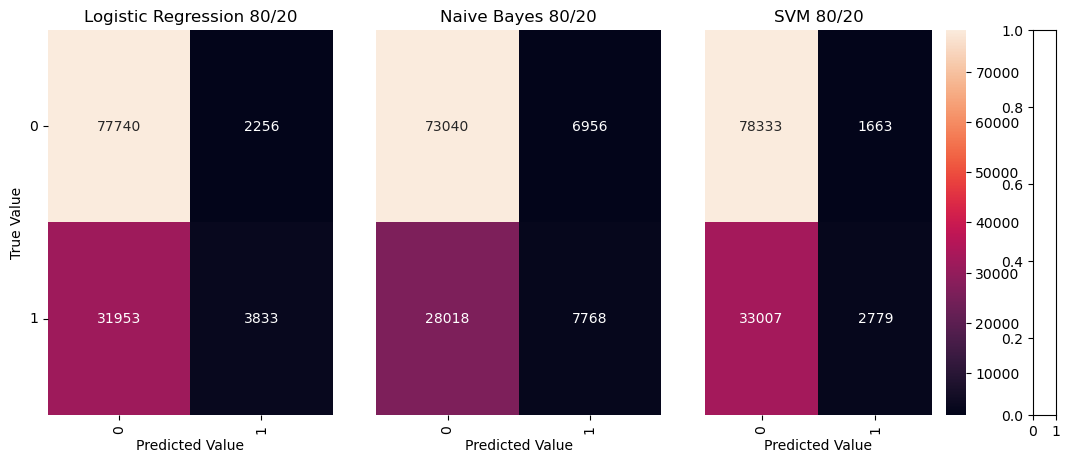

In [46]:
# logreg_heat = sn.heatmap(data=recordlinkage.confusion_matrix(test_matches_index, results_logreg, len(df_test)), annot=True, fmt='g')
# logreg_heat.set(xlabel='Predicted Value', ylabel='True Value')

f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index, results_logreg, len(df_test)), annot=True, fmt='g', cbar=False,ax=ax1)
g1.set_ylabel('True Value')
g1.set_xlabel('Predicted Value')
g1.set_title('Logistic Regression 80/20')
g2 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index, results_nb, len(df_test)), annot=True, fmt='g', cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Predicted Value')
g2.set_title('Naive Bayes 80/20')
g2.set_yticks([])
g3 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index, result_svm, len(df_test)), annot=True, fmt='g', cbar=axcb,ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('Predicted Value')
g3.set_title('SVM 80/20')
g3.set_yticks([])


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    ttl = ax.get_title()
    ax.set_title(ttl, rotation=0)
f.set_figheight(5)
f.set_figwidth(13)
plt.show()

Another way to view this is by the correlation matrix for each model. The set above is for the 80/20 Split models. In these heat maps, the (0,0) is *True Postives*, (0,1) is *False Positvies*, (1,1) is *True Negatives*, and (1,0) is *False Negatives*.

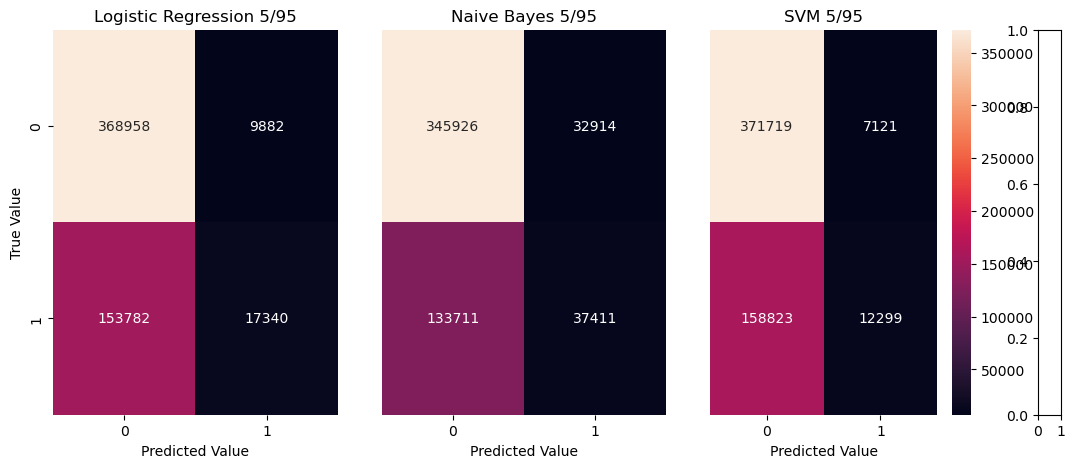

In [47]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index2, results_logreg2, len(df_test2)), annot=True, fmt='g', cbar=False,ax=ax1)
g1.set_ylabel('True Value')
g1.set_xlabel('Predicted Value')
g1.set_title('Logistic Regression 5/95')
g2 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index2, results_nb2, len(df_test2)), annot=True, fmt='g', cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Predicted Value')
g2.set_title('Naive Bayes 5/95')
g2.set_yticks([])
g3 = sns.heatmap(data=recordlinkage.confusion_matrix(test_matches_index2, result_svm2, len(df_test2)), annot=True, fmt='g', cbar=axcb,ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('Predicted Value')
g3.set_title('SVM 5/95')
g3.set_yticks([])

f.set_figheight(5)
f.set_figwidth(13)
plt.show()

# Conclusion

Ultimatley, I decided to use the Naive Bayes model. For my particular task, false positives are more harmful than false neagatives due to the business context. A false postivie match means that the two respective locations will not be as thoroughly audited. The bottom line is that false companies will cause this business more money than false negatives. The Naive Bayes model is the most suited for this task as the metrics showed it was the least likely to predict a false positive. 


Despite this conclusion, there is still room for improvements. In future iterations of this task, there are a few updates I would like to make to fine tune an even better result. I would like to implemenet gridsearch to automate parameter tuning as opposed to the hand tuning I have done up to this point. However this may force me to step away from the recordlinkage library which is a requirement for this business task.